In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data ='/content/drive/My Drive/Colab Notebooks/LARP_ASS1/Dataset_2_Team_29.csv'


In [0]:
x=pd.read_csv(data)

In [0]:
x=x.iloc[:,1:].values



In [6]:
mean=np.mean(x,axis=0)
mean.shape

(10,)

In [0]:

m=np.transpose(np.reshape(mean,[10,1]))
m=np.tile(m,(100,1))
std=np.std(x,axis=0)
std=np.transpose(np.reshape(std,[10,1]))
std=np.tile(std,(100,1))


In [8]:
X=(x-m)/std
print(X.shape)
X=np.transpose(X)
Covariance=X@np.transpose(X)
Covariance=Covariance/(100)
print(Covariance.shape)
eigvals,eigvecs=np.linalg.eigh(Covariance)


(100, 10)
(10, 10)


In [9]:
idx = eigvals.argsort()[::-1]   
print('idx',idx)
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
eigvals
eigvecs
D=np.dot(eigvecs[:,1],eigvecs[:,0])
D

idx [9 8 7 6 5 4 3 2 1 0]


-2.0816681711721685e-17

In [0]:
def projection(eigvecs,k,X):
  projMatrix= np.transpose(eigvecs[:,:k])
  
  projec= projMatrix@X
  return projec

In [11]:
projected=projection(eigvecs,2,X)
projected=np.transpose(projected)
projected.shape

(100, 2)

In [0]:
k1=eigvecs[:,0]
k2=eigvecs[:,1]

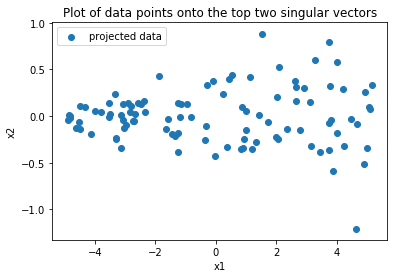

In [21]:
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.title('Plot of data points onto the top two singular vectors')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [0]:
def infoLost(X,eigvecs,k):
  projMatrix= np.transpose(eigvecs[:,:k])
  projMatrix = np.matmul(eigvecs[:,:k],projMatrix)
  projecData= projMatrix@X
  err=X-projecData
  error=np.linalg.norm(err)**2
  return error

In [0]:
L=[]
for i in range(10):
  L.append(infoLost(X,eigvecs,i+1))

In [16]:
L

[50.51997729523529,
 41.626770873948246,
 33.54575485023998,
 26.400639893689625,
 20.063274653185037,
 14.071947567954746,
 9.698653970187273,
 5.8860385381822065,
 2.544526800578185,
 1.0459654744399249e-28]

In [0]:
def infoEigLost(k,eigvals):
  eig=np.sort(eigvals)
  errorEig=np.sum(eig[:k])
  return errorEig

In [0]:
L=[]
for i in range(10):
  L.append(infoEigLost(i,eigvals))

In [19]:
L

[0.0,
 0.025445268005781903,
 0.0588603853818221,
 0.09698653970187232,
 0.14071947567954723,
 0.20063274653185034,
 0.26400639893689587,
 0.33545754850239967,
 0.41626770873948193,
 0.5051997729523524]